## Detection Notebook

This notebook can be seen for using YOLOv4 weights trained for custom data.
I have trained it on Kaggle [Global-Wheat-Detection](https://www.kaggle.com/c/global-wheat-detection) Competition Dataset.

In [1]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
label_path = "./obj.names"
LABELS = open(label_path).read().strip().split("\n")

weights_path = "custom-yolov4-detector_last.weights"
cfg_path = "custom-yolov4-detector.cfg"

In [3]:
yolo_net = cv2.dnn.readNetFromDarknet(cfg_path, weights_path)
yolo_net.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
yolo_net.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA)
ln = yolo_net.getLayerNames()
ln = [ln[i[0] - 1] for i in yolo_net.getUnconnectedOutLayers()]

In [4]:
img_path = "test/"

In [95]:
images = os.listdir(img_path)
images

['2fd875eaa.jpg',
 '348a992bb.jpg',
 '51b3e36ab.jpg',
 '51f1be19e.jpg',
 '53f253011.jpg',
 '796707dd7.jpg',
 'aac893a91.jpg',
 'cb8d261a3.jpg',
 'cc3532ff6.jpg',
 'f5a1f0358.jpg',
 'test.jpg']

In [108]:
img_1 = images[0]

In [109]:
w = 256
h = 256

In [110]:
img_bgr = cv2.imread(img_path+img_1)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_resized = cv2.resize(img_rgb, (256, 256))

In [111]:
blob = cv2.dnn.blobFromImage(img_resized, 1 / 255.0, (256, 256), swapRB=True, crop=False)

In [112]:
yolo_net.setInput(blob)
outputs = yolo_net.forward(ln)

In [113]:
boxes = []
confidences = []
classIDs = []
for output in outputs:
    for detection in output:
        scores = detection[4:]
        classID = np.argmax(scores)
        confidence = scores[classID]
        
        #if confidence > 0.0005:
        box = detection[0:4] * np.array([w, h, w, h])
        (centerX, centerY, width, height) = box.astype("int")

        x = int(centerX - (width / 2))
        y = int(centerY - (height / 2))

        boxes.append([x, y, int(width), int(height)])
        confidences.append(float(confidence))
        classIDs.append(classID)
            
idxs = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0)

if len(idxs) > 0:
    idf = idxs.flatten()

    for i in idf:

        x, y = boxes[i][0], boxes[i][1]
        width, height = boxes[i][2], boxes[i][3]
        cv2.rectangle(img_resized, (x,y), (x+width, y+height), (250, 200, 0), 2)
        confid = confidences[i]
        name_class = LABELS[classIDs[i]]

usask


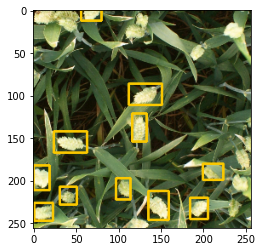

In [114]:
print(name_class)
plt.imshow(img_resized)

In [119]:
img_save = cv2.resize(img_resized[:,:,::-1], (500,500))
cv2.imwrite("sample.png", img_save)

True